**This notebook I am trying to build a spam classifier. I will be using K Means, PCA and PCA + KNN **

In [ ]:
import urllib.request
import io
import numpy as np
import pandas as pd
import seaborn as sns


In [ ]:
url = "http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv"
data = urllib.request.urlopen(url)
csv_bytes = data.read()
csv_string = csv_bytes.decode("utf8")
csv_data = io.StringIO(csv_string)
df = pd.read_csv(csv_data)


In [ ]:
df

,type,msg
0,ham,Go until jurong point crazy.. Available only i...
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,Nah I don't think he goes to usf he lives arou...
...,...,...
5307,spam,REMINDER FROM O2: To get 2.50 pounds free call...
5308,spam,This is the 2nd time we have tried 2 contact u...
5309,ham,Will ü b going to esplanade fr home?
5310,ham,Pity * was in mood for that. So...any other su...


In [ ]:
df.columns

Index(['type', 'msg'], dtype='object')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import os
import nltk.stem

In [ ]:
english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedTfidfVectorizer(TfidfVectorizer):
   def build_analyzer(self):
     analyzer = super(StemmedTfidfVectorizer, self).build_analyzer()
     return lambda doc: (english_stemmer.stem(w) for w in analyzer(doc))

In [ ]:
#vectorizer = StemmedTfidfVectorizer(min_df=1, stop_words='english')
vectorizer = TfidfVectorizer(stop_words = 'english')
X_train = vectorizer.fit_transform(df['msg'])

In [ ]:
km = KMeans(n_clusters= 2, init='random', n_init= 40, verbose=0)
km.fit(X_train)

KMeans(init='random', n_clusters=2, n_init=40)

In [ ]:
df['cluster'] = km.labels_
df

,type,msg,cluster
0,ham,Go until jurong point crazy.. Available only i...,0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,0
4,ham,Nah I don't think he goes to usf he lives arou...,0
...,...,...,...
5307,spam,REMINDER FROM O2: To get 2.50 pounds free call...,0
5308,spam,This is the 2nd time we have tried 2 contact u...,0
5309,ham,Will ü b going to esplanade fr home?,0
5310,ham,Pity * was in mood for that. So...any other su...,0


In [ ]:
def spam_cluster_summary():
  cluster_counts = df['cluster'].value_counts()
  print(cluster_counts)
  cluster_spam_percentages = df.groupby('cluster')['type'].apply(lambda x: (x == 'spam').mean() * 100)
  print(cluster_spam_percentages)
  overall_spam_percentage = (df['type'] == 'spam').mean() * 100
  print(f"Overall Spam Percentage in Dataset: {overall_spam_percentage:.2f}%")
  print("\nCluster Summary:")
  for cluster, count in cluster_counts.items():
      spam_percentage = cluster_spam_percentages[cluster]
      print(f"Cluster {cluster}:")
      print(f"Total items: {count}")
      print(f"Spam Percentage: {spam_percentage:.2f}%\n")


In [ ]:
spam_cluster_summary()

0    5087
1     225
Name: cluster, dtype: int64
cluster
0    13.465697
1     0.444444
Name: type, dtype: float64
Overall Spam Percentage in Dataset: 12.91%

Cluster Summary:
Cluster 0:
Total items: 5087
Spam Percentage: 13.47%

Cluster 1:
Total items: 225
Spam Percentage: 0.44%



In [ ]:
km = KMeans(n_clusters= 15, init='random', n_init= 50, verbose=0)
km.fit(X_train)

KMeans(init='random', n_clusters=15, n_init=50)

df['cluster'] = km.labels_
spam_cluster_summary()

In [ ]:
df['cluster'] = km.labels_
spam_cluster_summary()

5     3327
3      261
2      250
13     188
11     178
14     163
0      147
10     139
8      130
7      114
9      114
12     113
6       95
4       53
1       40
Name: cluster, dtype: int64
cluster
0     99.319728
1     40.000000
2      3.200000
3     12.643678
4      0.000000
5      6.221821
6     64.210526
7      0.000000
8     68.461538
9      0.000000
10     0.719424
11     6.741573
12    89.380531
13     6.382979
14     0.000000
Name: type, dtype: float64
Overall Spam Percentage in Dataset: 12.91%

Cluster Summary:
Cluster 5:
Total items: 3327
Spam Percentage: 6.22%

Cluster 3:
Total items: 261
Spam Percentage: 12.64%

Cluster 2:
Total items: 250
Spam Percentage: 3.20%

Cluster 13:
Total items: 188
Spam Percentage: 6.38%

Cluster 11:
Total items: 178
Spam Percentage: 6.74%

Cluster 14:
Total items: 163
Spam Percentage: 0.00%

Cluster 0:
Total items: 147
Spam Percentage: 99.32%

Cluster 10:
Total items: 139
Spam Percentage: 0.72%

Cluster 8:
Total items: 130
Spam Percentage: 68.

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


Cluster Number: 7
------------------------------



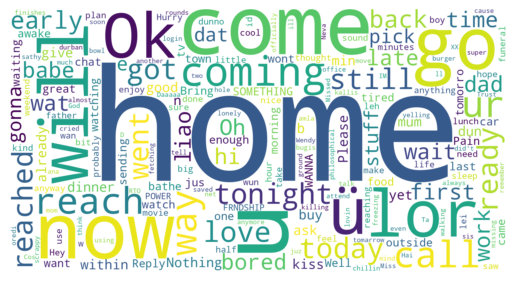

cluster size: 114
-I'm gonna be home soon and i don't want to talk about this stuff anymore tonight k? I've cried enough today.
-Your gonna have to pick up a $1 burger for yourself on your way home. I can't even move. Pain is killing me.
-HI BABE IM AT HOME NOW WANNA DO SOMETHING? XX
-Ok i am on the way to home hi hi
-I'm home.
-I jus reached home. I go bathe first. But my sis using net tell u when she finishes k...
-Home so we can always chat
-Sounds great! Are you home now?
-Ta-Daaaaa! I am home babe are you still up ?
-Bring home some Wendy =D



Cluster Number: 14
------------------------------



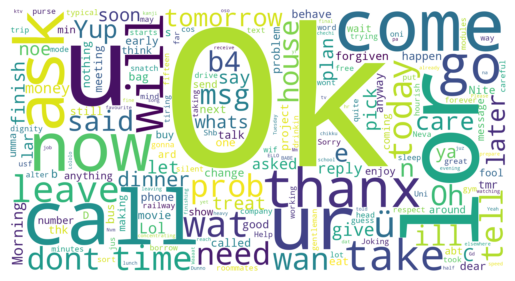

cluster size: 163
-Ok lar... Joking wif u oni...
-Sorry my roommates took forever it ok if I come by now?
-Ok... Ur typical reply...
-ok. I am a gentleman and will treat you with dignity and respect.
-U call me alter at 11 ok.
-Ok no prob. Take ur time.
-I asked you to call him now ok
-Ok. I asked for money how far
-Ok..
-Ok that's great thanx a lot.



Cluster Number: 5
------------------------------



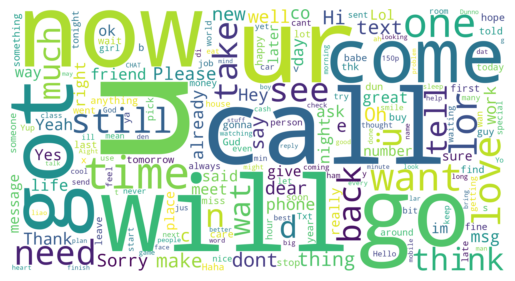

cluster size: 3327
-Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
-U dun say so early hor... U c already then say...
-Nah I don't think he goes to usf he lives around here though
-Even my brother is not like to speak with me. They treat me like aids patent.
-As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
-I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.
-I HAVE A DATE ON SUNDAY WITH WILL!!
-Oh k...i'm watching here:)
-Fine if thats the way u feel. Thats the way its gota b
-England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+



Cluster Number: 0
-----------------

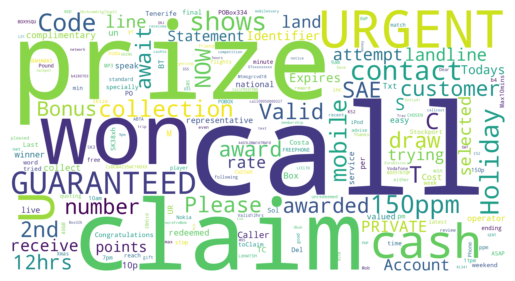

cluster size: 147
-WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
-URGENT! You have won a 1 week FREE membership in our £100000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
-As a valued customer I am pleased to advise you that following recent review of your Mob No. you are awarded with a £1500 Bonus Prize call 09066364589
-Urgent UR awarded a complimentary trip to EuroDisinc Trav Aco&Entry41 Or £1000. To claim txt DIS to 87121 18+6*£1.50(moreFrmMob. ShrAcomOrSglSuplt)10 LS1 3AJ
-Please call our customer service representative on 0800 169 6031 between 10am-9pm as you have WON a guaranteed £1000 cash or £5000 prize!
-GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
-You are a winner U have been specially selected 2 receiv

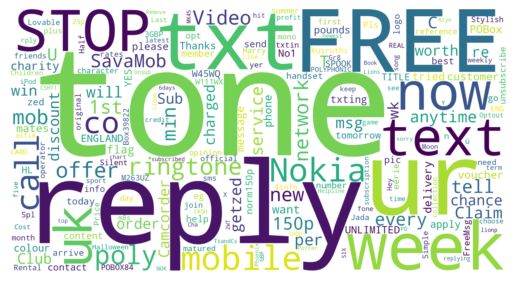

cluster size: 113
-SIX chances to win CASH! From 100 to 20000 pounds txt> CSH11 and send to 87575. Cost 150p/day 6days 16+ TsandCs apply Reply HL 4 info
-Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
-We tried to contact you re your reply to our offer of a Video Handset? 750 anytime networks mins? UNLIMITED TEXT? Camcorder? Reply or call 08000930705 NOW
-Ur ringtone service has changed! 25 Free credits! Go to club4mobiles.com to choose content now! Stop? txt CLUB STOP to 87070. 150p/wk Club4 PO Box1146 MK45 2WT
-Ringtone Club: Get the UK singles chart on your mobile each week and choose any top quality ringtone! This message is free of charge.
-Here is your discount code RP176781. To stop further messages reply stop. www.regalportfolio.co.uk. Customer Services 08717205546
-Thanks for your Ringtone Order Reference T91. You will be charged GBP 4 per week. You can unsubscribe a

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

clusters_of_interest = [7, 14, 5, 0, 12]

for cluster_id in clusters_of_interest:
    matching_indices = (km.labels_ == cluster_id)
    all_text = " ".join(txt for txt in df['msg'][matching_indices].tolist())

    print(f"\nCluster Number: {cluster_id}\n{'-' * 30}\n")

    word_cloud = WordCloud(collocations = False, background_color = 'white',
                           width = 2048, height = 1080).generate(all_text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

    print("cluster size:", df['msg'][matching_indices].size)
    print("-" + "\n-".join(txt for txt in df['msg'][matching_indices].head(10)))
    print("\n" + "="*50 + "\n")


In [ ]:
#finding out which messages that were in spam clusters are actually labelled as ham
cluster_id = 12


matching_indices = (km.labels_ == cluster_id) & (df['type'] == 'ham')

print(f"\nCluster Number: {cluster_id} (Ham Messages)\n{'-' * 30}\n")


for msg in df['msg'][matching_indices]:
    print("-", msg)

print("\n" + "="*50 + "\n")



Cluster Number: 12 (Ham Messages)
------------------------------

- Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..
- Aiyo... U always c our ex one... I dunno abt mei she haven reply... First time u reply so fast... Y so lucky not workin huh got bao by ur sugardad ah...gee.. 
- K..u also dont msg or reply to his msg..
- Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..
- Hey what's up charles sorry about the late reply.
- Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..
- Glad to see your reply.
- Hey what are you doing. Y no reply pa..
- Hey are you angry with me. Reply me dr.
- Send ur birthdate with month and year I will tel u ur LIFE PARTNER'S name. and the method of calculation. Reply must.
- Your opinion about me? 1. Ov

In [ ]:
#finding out which messages that were in ham clusters are actually labelled as spam
cluster_id = 5


matching_indices = (km.labels_ == cluster_id) & (df['type'] == 'spam')


print(f"\nCluster Number: {cluster_id} (SPam Messages)\n{'-' * 30}\n")


for msg in df['msg'][matching_indices]:
    print("-", msg)

print("\n" + "="*50 + "\n")


Cluster Number: 12 (SPam Messages)
------------------------------

- SIX chances to win CASH! From 100 to 20000 pounds txt> CSH11 and send to 87575. Cost 150p/day 6days 16+ TsandCs apply Reply HL 4 info
- Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
- We tried to contact you re your reply to our offer of a Video Handset? 750 anytime networks mins? UNLIMITED TEXT? Camcorder? Reply or call 08000930705 NOW
- Ur ringtone service has changed! 25 Free credits! Go to club4mobiles.com to choose content now! Stop? txt CLUB STOP to 87070. 150p/wk Club4 PO Box1146 MK45 2WT
- Ringtone Club: Get the UK singles chart on your mobile each week and choose any top quality ringtone! This message is free of charge.
- Here is your discount code RP176781. To stop further messages reply stop. www.regalportfolio.co.uk. Customer Services 08717205546
- Thanks for your Ringtone Order Reference T91. 

In [ ]:
new_texts = [
    "Hey I am working on some home renovations right this moment.",
    "Ok thanx for your help, we made some good progress",
    "will u call me now or before you go office? C don treat ne like a regular thing I love you",
    "CONGRATULATIONS! You've won a free cruise trip! Call 1234567890 now to claim. T&C apply.",
    "Free tones on reply! Get the latest ring tones for your phone now! Reply 'YES' to get started. First 5 tones FREE!"
]

In [ ]:
clusters_to_check = [7, 14, 5, 0, 12]

new_vectors = vectorizer.transform(new_texts).toarray()


distances = np.array([np.linalg.norm(new_vector - km.cluster_centers_[clusters_to_check], axis=1) for new_vector in new_vectors])

closest_clusters_indices = distances.argmin(axis=1)
closest_clusters = [clusters_to_check[index] for index in closest_clusters_indices]


for text, cluster in zip(new_texts, closest_clusters):
    print(f"'{text}' is closest to Cluster {cluster}")

'Hey I am working on some home renovations right this moment.' is closest to Cluster 7
'Ok thanx for your help, we made some good progress' is closest to Cluster 14
'will u call me now or before you go office? C don treat ne like a regular thing I love you' is closest to Cluster 5
'CONGRATULATIONS! You've won a free cruise trip! Call 1234567890 now to claim. T&C apply.' is closest to Cluster 0
'Free tones on reply! Get the latest ring tones for your phone now! Reply 'YES' to get started. First 5 tones FREE!' is closest to Cluster 12


In [ ]:
#Making sure texts don't exists already
existing_texts = [text for text in new_texts if text in df['msg'].values]

if not existing_texts:
    print("None of the new texts exist in the dataframe.")
else:
    print("The following texts already exist in the dataframe:")
    for text in existing_texts:
        print(f"- {text}")

None of the new texts exist in the dataframe.


Question 3

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

In [ ]:
messages = df['msg']

In [ ]:
tf_vectorizer = TfidfVectorizer()
msg_tfidf = tf_vectorizer.fit_transform(messages)

In [ ]:
pca = PCA(n_components=3)
msg_pca = pca.fit_transform(msg_tfidf.toarray())

In [ ]:
components_df = pd.DataFrame(data = msg_pca, columns = ['PC1', 'PC2', 'PC3'])

df

,type,msg,cluster,PCA1,PCA2,PCA3
0,ham,Go until jurong point crazy.. Available only i...,5,0.050730,-0.022702,-0.048122
1,ham,Ok lar... Joking wif u oni...,14,0.210394,-0.087885,0.159301
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,6,0.019003,-0.007990,-0.063722
3,ham,U dun say so early hor... U c already then say...,5,0.082522,-0.043936,-0.033909
4,ham,Nah I don't think he goes to usf he lives arou...,5,0.009443,-0.026358,-0.037825
...,...,...,...,...,...,...
5307,spam,REMINDER FROM O2: To get 2.50 pounds free call...,8,-0.019226,0.035808,-0.056944
5308,spam,This is the 2nd time we have tried 2 contact u...,0,0.001158,0.037189,-0.092025
5309,ham,Will ü b going to esplanade fr home?,10,0.028922,-0.027890,-0.052313
5310,ham,Pity * was in mood for that. So...any other su...,5,0.010538,-0.015853,-0.048180


In [ ]:
fig = px.scatter_3d(df, x = 'PCA1',y='PCA2', z = 'PCA2', color = 'type', hover_data={'PCA1', 'PCA2', 'PCA3', 'msg'},labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2', 'PCA3': 'Principal Component 3'},)


In [ ]:
fig.show()

In [ ]:
fig = px.scatter(components_df, x="PC1", y="PC2")
fig = px.scatter(components_df, x="PC1", y="PC2", color = df["type"])
fig.show()

In [ ]:
num_features = df.shape[1] - 1


There are 5 total features in the dataset.


In [ ]:

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = explained_variance_ratio.cumsum()

num_components_50_percent = (cumulative_explained_variance > 0.5).sum() + 1

df_variance = pd.DataFrame({
    'Number of Principal Components': range(1, len(cumulative_explained_variance) + 1),
    'Cumulative Explained Variance': cumulative_explained_variance
})

fig = px.line(df_variance,
              x='Number of Principal Components',
              y='Cumulative Explained Variance',
              title='Cumulative Explained Variance vs. Number of Principal Components',
              labels={'Cumulative Explained Variance': 'Cumulative Explained Variance'},
              markers=True)

fig.add_shape(type="line",
              x0=num_components_50_percent, x1=num_components_50_percent,
              y0=0, y1=0.03,
              line=dict(color="Red", dash="dot"),
              name=f'>{50}% Explained Variance')

fig.update_layout(yaxis=dict(range=[0, 0.03]))

fig.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
import time

In [ ]:
X = df['msg']
y = df['type']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(msg_tfidf, y, test_size=0.3, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_full_vectorized = knn.predict(X_test)

In [ ]:
accuracy_full_vectorized = accuracy_score(y_test, y_pred_full_vectorized)
f1_score_full_vectorized = f1_score(y_test, y_pred_full_vectorized, pos_label='spam')

In [ ]:
from sklearn.decomposition import PCA
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

pca = PCA(n_components=500)
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()
k = (cumulative_explained_variance > 0.5).sum() + 1

In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_pca.fit(X_train_pca[:, :k], y_train)
y_pred_pca = knn_pca.predict(X_test_pca[:, :k])

accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_score_pca = f1_score(y_test, y_pred_pca, pos_label='spam')

print(f"1-NN Classifier (Top {k} PCA Components) -- Accuracy:", accuracy_pca)
print(f"1-NN Classifier (Top {k} PCA Components) -- F1 Score:", f1_score_pca)

1-NN Classifier (Top 209 PCA Components) -- Accuracy: 0.9592220828105396
1-NN Classifier (Top 209 PCA Components) -- F1 Score: 0.8293963254593175


In [ ]:

# With PCA
start_time = time.time()

knn_pca = KNeighborsClassifier(n_neighbors=1)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

end_time = time.time()
runtime_pca = end_time - start_time

accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_score_pca = f1_score(y_test, y_pred_pca, pos_label='spam')

# Print results
print("Without dimensionality reduction:")
print("Runtime:", runtime_full)
print("Accuracy:", accuracy_full_vectorized)
print("F1 Score:", f1_score_full_vectorized)

print("\nWith PCA dimensionality reduction:")
print("Runtime:", runtime_pca)
print("Accuracy:", accuracy_pca)
print("F1 Score:", f1_score_pca)


Without dimensionality reduction:
Runtime: 3.566159963607788
Accuracy: 0.9479297365119197
F1 Score: 0.7537091988130563

With PCA dimensionality reduction:
Runtime: 0.32973670959472656
Accuracy: 0.9510664993726474
F1 Score: 0.7857142857142858


**5. BUILDING AN ACCURATE SPAM DETECTION CLASSIFIER**

In [ ]:
# All documentation in the other written file

In [ ]:
url = "http://motioncore-umh.cs.umn.edu/4980/sms_spam_cleaned.csv"
data = urllib.request.urlopen(url)
csv_bytes = data.read()
csv_string = csv_bytes.decode("utf8")
csv_data = io.StringIO(csv_string)
df = pd.read_csv(csv_data)
messages = df['msg']
y = df['type']

In [ ]:
tf_vectorizer = TfidfVectorizer()
msg_tfidf = tf_vectorizer.fit_transform(messages)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(msg_tfidf, y, test_size=0.20, random_state=42)

# Applying PCA
n_components = 100  # You can tune this based on the previous explained variance graph
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train.toarray())
X_test_pca = pca.transform(X_test.toarray())

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, pos_label='spam')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9651928504233303
F1 Score: 0.8683274021352312

Classification Report:
               precision    recall  f1-score   support

         ham       0.98      0.98      0.98       919
        spam       0.89      0.85      0.87       144

    accuracy                           0.97      1063
   macro avg       0.93      0.92      0.92      1063
weighted avg       0.96      0.97      0.96      1063



**Trials that did not work out**

In [ ]:
#Diff